In [51]:
import sys
import time
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker

/Users/clivian/opt/anaconda3/bin/python


In [2]:
daily_ratings, movie_ratings = loadDic()
# dcount = 0
# mcount = 0
# for day in daily_ratings:
#     if daily_ratings[day].get(2571, -1) != -1:
#         dcount += len(daily_ratings[day][2571])
# for day in movie_ratings[2571]:
#     mcount += movie_ratings[2571][day]
# print(dcount, mcount)

In [5]:
def date_minus(cur_date, delta):
    cur_date = date(cur_date[0], cur_date[1], cur_date[2])
    res_date = cur_date - timedelta(delta)
    res_date = str(res_date)
    return int(res_date[0:4]), int(res_date[5:7]), int(res_date[8:10])

In [107]:
cur_date = (2019, 10, 1)
recent_ratings = {}
for i in range(1, 8):
    res_date = date_minus(cur_date, i)
    recent_ratings[res_date] = daily_ratings[res_date]
movies = {}
day_n = 0
for rating in recent_ratings:
    print(rating)
    for movie in recent_ratings[rating]:
        if movies.get(movie, -1) == -1:
            movies[movie] = [0] * 7
            movies[movie][day_n] = len(recent_ratings[rating][movie])
        movies[movie][day_n] += len(recent_ratings[rating][movie])
    day_n += 1
print(len(movies))

(2019, 9, 30)
(2019, 9, 29)
(2019, 9, 28)
(2019, 9, 27)
(2019, 9, 26)
(2019, 9, 25)
(2019, 9, 24)
5560


In [113]:
actual = daily_ratings[cur_date]
candidates_actual = {}
for movie in actual:
    candidates_actual[movie] = len(actual[movie])    
user_activities = getUserActivities(actual)
max_R = getMaxR(user_activities)
print(max_R)


interactions = {}
for movie in movies:
    interactions[movie] = sum(movies[movie])
topMovieKeys = getTopN(interactions, 400)
topMovieKeys.extend([-1] * max_R)
r_precition = RPrecision(user_activities, topMovieKeys)
print(r_precition)
# candidates = {}
# for key in topMovieKeys:
#     if key != -1:
#         candidates[key] = movies[key]
# hit = 0
# for candidate in candidates:
#     if candidate in candidates_actual:
#         hit += 1
#         print(candidate, candidates[candidate], candidates_actual[candidate])
# print(len(candidates_actual))
# print(hit)
        
    

719
0.02585021716378862


1381
1691
5560


<ipython-input-138-935137042f6b>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(8, -1, -1)])


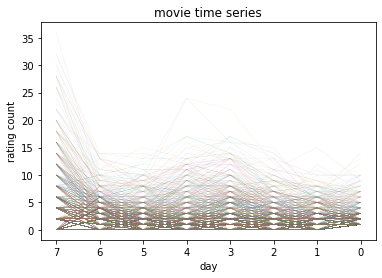

In [138]:
candidate_time_series = []
for movie in movies:
    if movie in candidates_actual:
        temp = [i for i in movies[movie]]
        temp.append(candidates_actual[movie])
        candidate_time_series.append(temp)
print(len(candidate_time_series))
print(len(candidates_actual))
print(len(movies))
fig, ax = plt.subplots()
temp_x = [i for i in range(8)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
ax.set_title('movie time series', loc='center')
ax.set_xticklabels([i for i in range(8, -1, -1)])
for series in candidate_time_series:
    ax.plot(temp_x,
            series,
            linewidth=0.05)
ax.set_xlabel('day')
ax.set_ylabel('rating count' )
fig.savefig('./figures/candidate_movie_time_series', bbox_inches='tight', dpi=300)

4179
1691
5560


<ipython-input-110-4b530f0da372>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(8, 0, -1)])


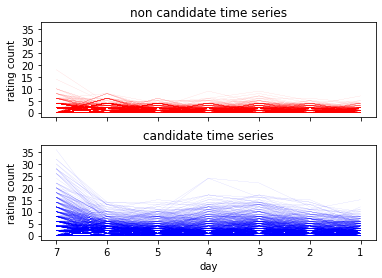

In [110]:
non_candidate_time_series = []
for movie in movies:
    if movie not in candidates_actual:
        non_candidate_time_series.append(movies[movie])
print(len(non_candidate_time_series))
print(len(candidates_actual))
print(len(movies))
fig, axl = plt.subplots(2, sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
temp_x = [i for i in range(7)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=5)
for ax in axl:
    ax.xaxis.set_major_locator(x_loc)
    ax.yaxis.set_major_locator(y_loc)
    ax.set_ylabel('rating count')
    ax.set_xticklabels([i for i in range(8, 0, -1)])
axl[0].set_title('non candidate time series', loc='center')
axl[1].set_title('candidate time series', loc='center')
axl[1].set_xlabel('day')
for series in non_candidate_time_series:
    axl[0].plot(temp_x,
            series,
            color = 'red',
            linewidth=0.05)
for series in candidate_time_series:
    axl[1].plot(temp_x,
            series[0:7],
            color = 'blue',
            linewidth=0.05)
fig.savefig('./figures/non_candidate_movie_time_series', bbox_inches='tight', dpi=300)

In [135]:
candidates_based_on_yesterday = {}
yesterday_threshold = 5
for movie in movies:
    if movies[movie][6] > yesterday_threshold:
        candidates_based_on_yesterday[movie] = movies[movie]
print(len(candidates_based_on_yesterday))
candiates_keys = [i for i in candidates_based_on_yesterday]

#based on recentPop
# interactions = {}
# for key in candiates_keys:
#     interactions[key] = sum(candidates_based_on_yesterday[key])
# candiates_keys = getTopN(interactions, 400)

candiates_keys.extend([-1] * max_R)
r_precition = RPrecision(user_activities, candiates_keys)
print(r_precition)
for candidate in candidates_based_on_yesterday:
    if candidate in candidates_actual:        
        print(candidate, candidates_based_on_yesterday[candidate], candidates_actual[candidate])


80
0.020979398069862428
201773 [22, 10, 10, 6, 12, 9, 8] 6
356 [28, 13, 11, 11, 12, 10, 6] 9
858 [14, 7, 3, 8, 8, 10, 7] 8
2028 [12, 5, 2, 10, 6, 5, 6] 8
2959 [30, 11, 15, 13, 15, 11, 10] 10
68954 [26, 6, 10, 8, 11, 3, 12] 7
91529 [10, 4, 8, 12, 14, 10, 6] 4
99114 [18, 10, 5, 13, 17, 6, 7] 7
527 [20, 8, 5, 6, 7, 9, 6] 7
4306 [24, 9, 7, 10, 14, 7, 8] 6
4993 [32, 13, 9, 15, 16, 14, 8] 7
6377 [14, 4, 4, 13, 11, 8, 11] 8
6539 [20, 8, 7, 15, 13, 8, 8] 5
6874 [16, 10, 7, 5, 14, 9, 8] 6
7153 [28, 10, 9, 10, 17, 13, 10] 10
8368 [14, 5, 3, 9, 10, 4, 7] 4
60069 [36, 8, 10, 9, 15, 7, 8] 5
122904 [20, 6, 7, 10, 13, 7, 8] 3
202439 [10, 6, 4, 5, 0, 3, 7] 5
122914 [26, 13, 11, 11, 13, 11, 15] 9
122916 [20, 8, 8, 5, 6, 6, 6] 6
122920 [16, 5, 5, 5, 6, 5, 6] 3
164179 [20, 8, 8, 12, 6, 6, 10] 3
187593 [10, 5, 7, 2, 9, 4, 7] 5
195159 [28, 8, 8, 6, 13, 9, 9] 7
318 [26, 10, 12, 17, 14, 9, 6] 14
3793 [6, 3, 3, 6, 6, 6, 6] 3
4226 [16, 9, 11, 5, 6, 10, 7] 10
5218 [12, 2, 3, 4, 6, 4, 6] 1
44191 [22, 4, 11, 6, 1